### regression based problem 
- simple linear regression
- multiple linear regression
- polynomial regression

#### simple linear regression
- y = mx + b  
- one dimensional data
- base fit line (minimum error) is calculated 
    - y is the dependent variable
    - x is the independent variable
    - m is the slope of the line
    - b is the y-intercept
for solving we need to find m and b
- closed form solution
    - m = (Σ(xi - x̄)(yi - ȳ)) / Σ(xi - x̄)²  where x is the independent variable and y is the dependent variable
    - b = ȳ - m * x̄
- non closed form solution
    - gradient descent
        - start with random values for m and b
        - calculate the error
        - update m and b using the learning rate
        - repeat until convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
df.shape


(200, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


Text(0.5, 1.0, 'CGPA vs Package')

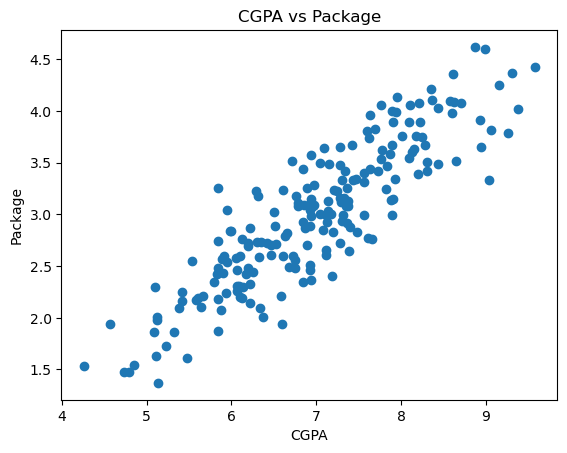

In [8]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('CGPA vs Package')


(array([ 4.,  9., 16., 34., 27., 47., 28., 18., 11.,  6.]),
 array([4.26 , 4.792, 5.324, 5.856, 6.388, 6.92 , 7.452, 7.984, 8.516,
        9.048, 9.58 ]),
 <BarContainer object of 10 artists>)

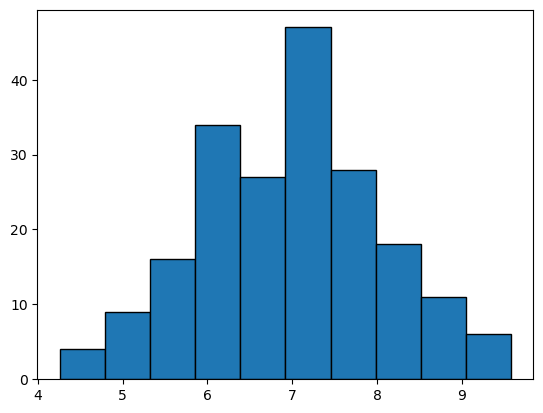

In [9]:
plt.hist(df['cgpa'], edgecolor='black')

<Axes: xlabel='cgpa'>

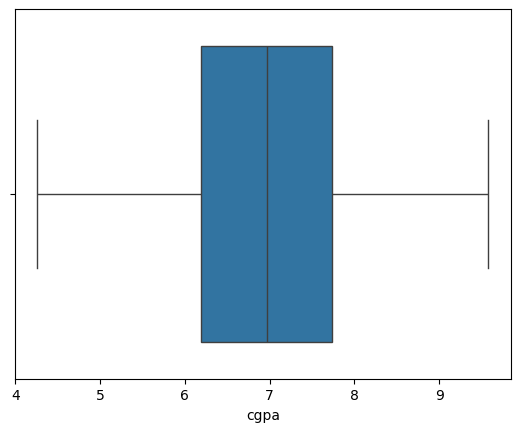

In [10]:
sns.boxplot(x='cgpa', data=df)

<Axes: xlabel='package', ylabel='Count'>

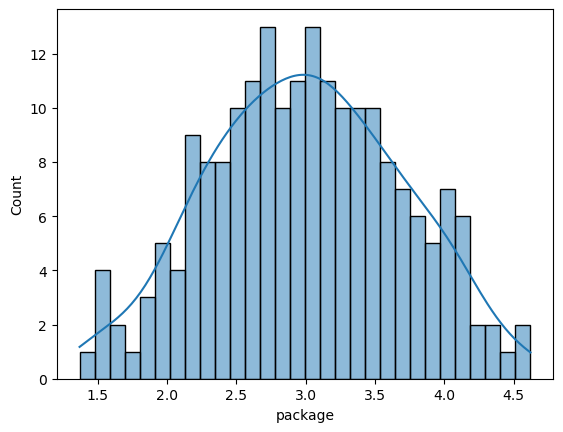

In [11]:
sns.histplot(df['package'], kde=True, bins=30)

<Axes: >

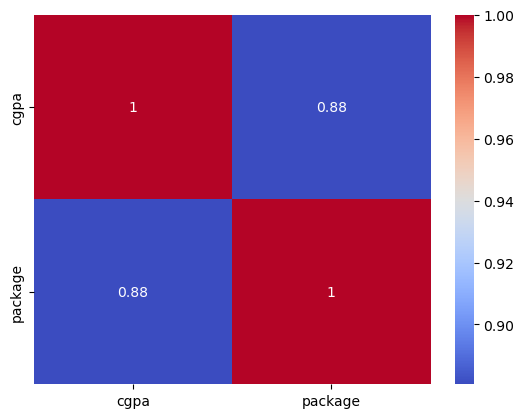

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [13]:
#find indipendent features
x = df.iloc[:, 0]
y = df.iloc[:, -1]
x


0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64

In [14]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

```
                      data set
    (arround 70%-80%) /       \ (20%-30%)
                   train     test
                    / \
                train  validation

```

In [15]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train

134    7.20
66     5.11
26     8.31
113    6.94
168    8.65
       ... 
67     6.51
192    8.25
117    7.12
47     5.84
172    6.93
Name: cgpa, Length: 160, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [17]:
model.fit(X_train.values.reshape(-1, 1), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
m = model.coef_
b = model.intercept_
m,b

(array([0.57633042]), np.float64(-1.0296070415163086))

In [19]:
cgpa = 9
package = m*cgpa + b
package

array([4.15736672])

In [20]:
y_pred = model.predict(X_test.values.reshape(-1, 1))
y_pred

array([2.97012606, 2.55516816, 2.61856451, 3.40237388, 3.05657563,
       2.35921582, 3.51763996, 2.4687186 , 4.1227869 , 3.21794814,
       2.12868365, 3.19489493, 2.53787825, 3.05081232, 3.36779405,
       2.86062328, 2.63009112, 2.82028015, 2.37074243, 2.91825632,
       3.1660784 , 2.3361626 , 3.50611335, 3.9902309 , 2.20360661,
       1.90967809, 3.08539215, 2.6070379 , 1.9212047 , 1.90391479,
       2.91249302, 3.69630239, 2.60127459, 2.09410383, 2.50906173,
       3.64443265, 3.17184171, 2.97012606, 3.83462169, 2.50329842])

In [21]:
err = y_test - y_pred
err

18     0.009874
170    0.314832
107   -0.028565
98     0.427626
177    0.583424
182   -0.279216
5     -0.527640
146   -0.008719
12    -0.472787
152   -0.137948
61    -0.518684
125   -0.034895
180    0.182122
154   -0.200812
80     0.072206
7     -0.380623
33     0.099909
130   -0.330280
37     0.059258
74     0.521744
183   -0.446078
145   -0.156163
45     0.073887
159    0.089769
60    -0.013607
123    0.390322
179   -0.055392
185    0.572962
122    0.088795
44    -0.043915
16    -0.562493
55    -0.306302
150    0.128725
111    0.155896
22    -0.209062
189    0.415567
129   -0.051842
4      0.599874
83    -0.344622
106   -0.313298
Name: package, dtype: float64

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7297167943957027

### Regression analysis
- find the performance of the model in ml

1. mean squared error(MSE)
    - MSE = (1/n) * Σ(yi - ŷi)²
    - where n is the number of samples, yi is the actual value, and ŷi is the predicted value
2. mean absolute error(MAE)
    - MAE = (1/n) * Σ|yi - ŷi|
    - where n is the number of samples, yi is the actual value, and ŷi is the predicted value
3. root mean squared error(RMSE)
    - RMSE = √MSE

##### advantage vs disadvantage of mse
- advantage
    - differentiable
- disadvantage
    - penalizes large errors more than small errors
    - not robust to outliers

##### R-squared
- R-squared (coefficient of determination) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
- R-squared = 1 - (Σ(yi - ŷi)² / Σ(yi - ȳ)²)
    - penalizes large errors more than small errors

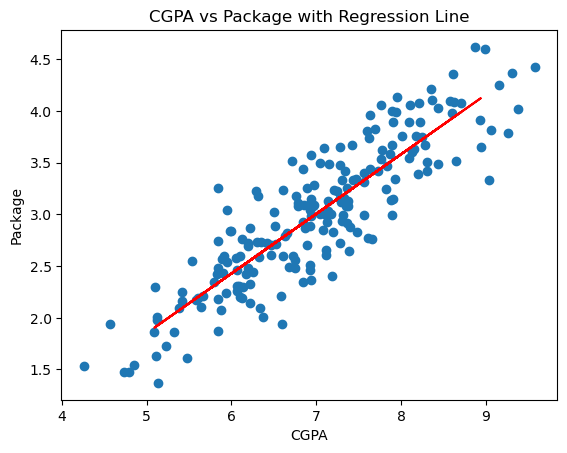

In [23]:
plt.scatter(df["cgpa"], df["package"])
plt.plot(X_test, y_pred, color = "red")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("CGPA vs Package with Regression Line")
plt.show()

### multy linear regression

